# 用CNN網路架構進行訓練

(1) 下載IMDB資料庫並對資料進行One-hot編碼

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
# 下載 IMDB Dataset 資料集
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# 資料前處理=>將資料轉換成 one-hot-encode
import numpy as np
 
def vectorize_sequences(sequences, dimension=10000):
    # 創建一個全零形狀的矩陣 (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # 將 results[i] 的特定索引設置為 1s
    return results
 
# 將訓練資料轉換成 One-hot 形式
x_train = vectorize_sequences(train_data)
# 將測試資料轉換成 One-hot 形式
x_test = vectorize_sequences(test_data)
# 將結果標記進行正規化
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

(2) 從訓練集中分離驗證建立RNN模型集

先將準備訓練的25000筆資料集，抽出10000筆資料集用在訓練時期的驗證資料，好讓我們監控訓練過程的準確性變化。

In [ ]:
# 從訓練集中切出驗證集資料
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

(3) 網路建置

使用三層網路，全連接層使用兩層 16 個神經元的網路，激勵函數設定為 relu，連接最後使用一個神經元輸出（表示正評或負評），並使用 sigmoid 作為最後輸出的啟動函數(代表機率值)。

In [6]:
# 建立 CNN 網路架構
from keras import models
from keras import layers
 
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

(4) 設定優化器與損失函數

將優化器設定為 adam，損失函數使用 binary_crossentropy，將網路進行 Compile

In [9]:
# 設定優化器與損失函數
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

(5) 訓練CNN模型

In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=100,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/100
30/30 [==============================] - 6s 74ms/step - loss: 0.5502 - accuracy: 0.7639 - val_loss: 0.3986 - val_accuracy: 0.8580
Epoch 2/100
30/30 [==============================] - 1s 18ms/step - loss: 0.2997 - accuracy: 0.9024 - val_loss: 0.2955 - val_accuracy: 0.8880
Epoch 3/100
30/30 [==============================] - 1s 18ms/step - loss: 0.2015 - accuracy: 0.9351 - val_loss: 0.2779 - val_accuracy: 0.8889
Epoch 4/100
30/30 [==============================] - 1s 18ms/step - loss: 0.1478 - accuracy: 0.9542 - val_loss: 0.2850 - val_accuracy: 0.8866
Epoch 5/100
30/30 [==============================] - 1s 19ms/step - loss: 0.1122 - accuracy: 0.9688 - val_loss: 0.2982 - val_accuracy: 0.8825
Epoch 6/100
30/30 [==============================] - 1s 18ms/step - loss: 0.0853 - accuracy: 0.9783 - val_loss: 0.3229 - val_accuracy: 0.8807
Epoch 7/100
30/30 [==============================] - 1s 17ms/step - loss: 0.0648 - accuracy: 0.9869 - val_loss: 0.3487 - val_accuracy: 0.8788
Epoch 

(6) 訓練結果圖表分析

透過上面的方法可以取得訓練 History 包含的資訊，然後我們將資訊繪製成為圖表，首先觀察 loss 變化

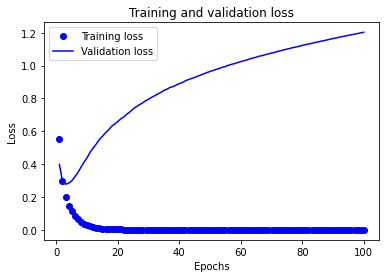

In [12]:
import matplotlib.pyplot as plt
 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(1, len(acc) + 1)
 
# "bo" 用來畫出 "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b 用來畫出 "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
 
plt.show()

(6) 這邊也可以產生圖表來觀察正確率的變化

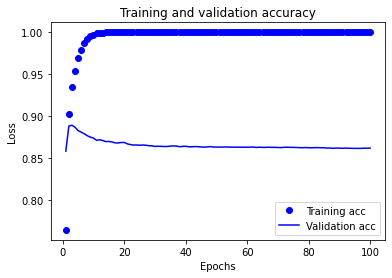

In [14]:
plt.clf()   # clear figure
history_dict = history.history
history_dict.keys()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
 
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
 
plt.show()

由上面的數據可以看出來，以現在的網路架構，其實在第 3 次 Epoch 就已經獲得最佳的結果，之後的訓練已經造成過度擬合 (Over Fitting)，因此在這個案例中將 Epoch 設定為 3 或 4 是取得最佳訓練模型的方法。